In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import torch

iris = load_iris()

encoder = OneHotEncoder(sparse=False)
x_train = iris.data
y_train =encoder.fit_transform(iris.target.reshape(-1, 1))
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = x_train.float()
y_train = y_train.float()


In [8]:
import torch

data_federation = [[x_train, y_train], [x_train, y_train]]

in_layer = 4
out_layer = 3
optimizer = "SGD"
criterion = "MSELoss"
starting_model = torch.rand(in_layer, out_layer)
epochs = 1000
learn_rate = 0.1

In [9]:
from sail_safe_functions.machine_learning.models.LogisticRegression import LogisticRegression


model = LogisticRegression(in_layer, out_layer)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

In [10]:
from torch.autograd import Variable

for epoch in range(epochs):

    inputs = Variable(x_train)
    labels = Variable(y_train)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.34064406156539917
epoch 1, loss 0.3290984332561493
epoch 2, loss 0.3157104551792145
epoch 3, loss 0.30043911933898926
epoch 4, loss 0.2836293876171112
epoch 5, loss 0.2662922441959381
epoch 6, loss 0.25012773275375366
epoch 7, loss 0.23684470355510712
epoch 8, loss 0.2271239161491394
epoch 9, loss 0.22045058012008667
epoch 10, loss 0.2158730924129486
epoch 11, loss 0.212601900100708
epoch 12, loss 0.21012447774410248
epoch 13, loss 0.20812833309173584
epoch 14, loss 0.20641976594924927
epoch 15, loss 0.2048741728067398
epoch 16, loss 0.20340855419635773
epoch 17, loss 0.2019663006067276
epoch 18, loss 0.2005082368850708
epoch 19, loss 0.19900721311569214
epoch 20, loss 0.1974448263645172
epoch 21, loss 0.19580979645252228
epoch 22, loss 0.19409756362438202
epoch 23, loss 0.1923103630542755
epoch 24, loss 0.1904580295085907
epoch 25, loss 0.1885584145784378
epoch 26, loss 0.18663713335990906
epoch 27, loss 0.18472594022750854
epoch 28, loss 0.18285949528217316
epoch 29, 

In [11]:
predicted = model(x_train)

In [12]:
predictions = []
for prediction in predicted:
        predictions.append(prediction.argmax())
predictions

labels = []
for y in y_train:
        labels.append(y.argmax())

column_a = []
for x in x_train:
    column_a.append(x[0])
    

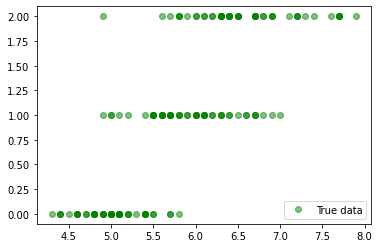

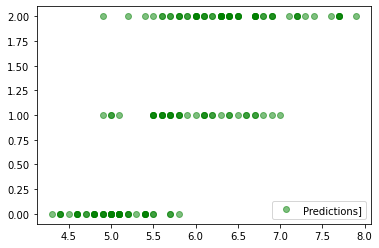

In [16]:
import matplotlib.pyplot as plt

plt.plot(column_a, labels, 'go', label='True data', alpha=0.5)
plt.legend(loc='best')
plt.show()
plt.plot(column_a, predictions, 'go', label='Predictions]', alpha=0.5)
plt.legend(loc='best')
plt.show()